# Homework 03 - Python introduction

### Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:*** is a code snippet that has a specific usecase and that can be executed to perform the defined task

***Variable:*** A variable is a label that you can assgin values to, it is a reference to a defined value

***Calling a function:*** a term used to descirbe the execution of the perviously defined function

***String:*** a datatyp in python; inside quotation marks

### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`.

Plot the time series `sociology_doctorates` and `space_launches` on a relative scale, i.e. as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis, the last data point in both time series should be 100%). Add a second plot which displays the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')` (data set 1 on x-axis, data set 2 on y-axis absolute units, not percentage).

Instead using the given time series, you can also use any other spurious correlation, if you want to search a different dataset.

Analyze both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

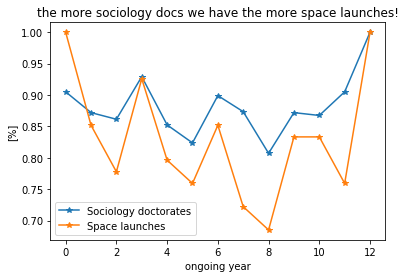

In [1]:
sociology_doctorates = [601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664]
space_launches = [54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54]
years = list(range(1997, 2009 + 1))

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


percent_sociology_doctorates = [i/sociology_doctorates[-1] for i in sociology_doctorates]
percent_space_launches = [i/space_launches[-1] for i in space_launches]

plt.plot(percent_sociology_doctorates, marker ='*', label = 'Sociology doctorates')
plt.plot(percent_space_launches, marker='*', label = 'Space launches')
plt.xlabel ('ongoing year')
plt.ylabel ('[%]')
plt.title('the more sociology docs we have the more space launches!')
# didn't figure out how to correctly apply xticks to manually rename x-axis values
plt.legend()

plt.show()

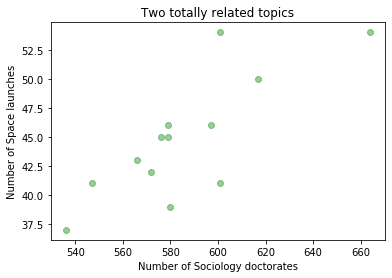

In [2]:
plt.scatter(sociology_doctorates, space_launches, c='g', alpha=0.4)

plt.xlabel('Number of Sociology doctorates')
plt.ylabel('Number of Space launches')
plt.title('Two totally related topics')

plt.show()

In [3]:
correlation = np.corrcoef(sociology_doctorates, space_launches)
print(correlation)

[[1.        0.7891496]
 [0.7891496 1.       ]]


In [ ]:
The numbers of sociology doctorates & space launches share the same up and down cycles. 
They have a pearson correlation coefficent of 0.79, which represents a correlation of 79%.
Altough this represents a not negligible correlation of these to datasets, 
there is no indication whatsoever that a causal relationship exist.

### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an oversimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t):=\frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also add a horizontal line and label it with "healthcare system capacity".

Then analyze the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epidemic.

Bonus question: Is there something one can still learn from it?

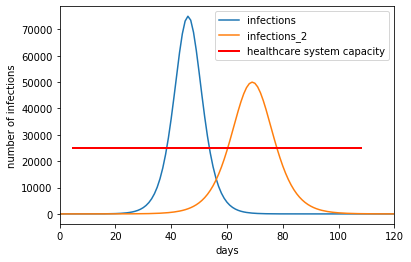

In [5]:
from math import e


# np.arange was the only type i came up with to get the function return infection_number?
t = np.arange(251)
P = 1000000
k = 3 / (P * 10)
k2 = 2 / (P * 10)


def new_infections (t, k):
    infection_number = ((e**(-k*P*t))*k*P**2*(-1+(P/1))) / ((1+(e**(-k*P*t))*(-1+(P/1)))**2)
    return infection_number

def new_infections_2 (t, k2):
    infection_number_2 = ((e**(-k2*P*t))*k2*P**2*(-1+(P/1))) / ((1+(e**(-k2*P*t))*(-1+(P/1)))**2)
    return infection_number_2



# tried to use zip 
# so that i don't have to define two identical functions, just w/ diffrent values
# but didn't firgue it out (not even w/ stockoverflow help)

# def infection_rate (t, k):
#    return zip(*[new_infetions(t,k)
#                 for t,k in zip(t[:0], t[1:])])




plt.plot(t,new_infections(t,k),label = 'infections')
plt.plot(t,new_infections_2(t,k2),label = 'infections_2')
plt.axhline(y=25000, xmin=0.04, xmax=0.9, linewidth=2, color = 'r', label="healthcare system capacity")

plt.xlim(0, 120)

plt.xlabel('days')
plt.ylabel('number of infections')

plt.legend()
plt.show()

##### Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probability $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differentiating $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t):=i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion).

##### Solution

Write your code here:

In [ ]:
Code above.

The model does not take into account the people that are already cured and (probably) can't get infected once more. 
Furthermore, people do not meet random other people from the whole dataset, the infections are in fact cluster
over a given region. Also the model does not seem to take into account the 'real' duration of the infection,
which would result into rather skewed infection function, instead of the symteric one above. 

What we can still learn from this is the exponential growth of the infection rate without any restrictive measures. 
Also a realativly small change in 'k' leads to a very diffrent outcome regrading the peak of infections. 

##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following code.

**Warning:** After running `%matplotlib notebook` you cannot plot in other cells any longer. Restart the Jupyter kernel and refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc)

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [6]:
Fibonacci_start = [0,1] 
  
def fibonacci(n):    
    if n<=len(Fibonacci_start): 
        return Fibonacci_start[n-1] 
    else: 
        current_fib = fibonacci(n-1)+fibonacci(n-2) 
        Fibonacci_start.append(current_fib) 
        return current_fib 

print(fibonacci(100)) 

218922995834555169026
